<a href="https://colab.research.google.com/github/KimThy13/Fundamental-ML/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mini-Project for Fundamentals of Machine Learning Course
In this study, facial expression recognition was performed on the face images from the Facial Expression Recognition Challenge (FER2013) dataset.

One motivation for representation learning is that learning algorithms can design features more effectively and efficiently than humans can. However, this challenge does not explicitly require entries to use representation learning. The dataset, assembled from the internet, is designed for facial expression classification.

The data consists of grayscale images of faces, each measuring 48x48 pixels. The faces have been automatically aligned to be roughly centered and occupy a similar area within each image. The task is to categorize each face based on the emotion expressed, assigning it to one of seven categories (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral). The dataset contains a total of 35,887 examples.

## 1. Prerequisite
This section provides some basic steps for accessing and visualizing the dataset.

In [6]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [7]:
def parse_data(data: pd.DataFrame):
    """
    Reads input dataframe then return arrays of images and labels
    """
    image_array = np.zeros(shape=(len(data), 48, 48))
    image_label = np.array(list(map(int, data['emotion'])))

    for i, row in enumerate(data.index):
        image = np.fromstring(data.loc[row, 'pixels'], dtype=int, sep=' ')
        image = np.reshape(image, (48, 48))
        image_array[i] = image

    return image_array, image_label

In [8]:
def show_img(images: np.ndarray, labels: np.ndarray):
    """
    Visualize images and labels respectively
    """
    _, axarr=plt.subplots(nrows=2, ncols=5, figsize=(18, 9))
    axarr=axarr.flatten()
    for idx, label in enumerate(labels[:10]):
        axarr[idx].imshow(images[idx], cmap='gray')
        axarr[idx].set_xticks([])
        axarr[idx].set_yticks([])
        axarr[idx].set_title("Label:{}".format(label))

In [9]:
## load dataset here
path = "../data/icml_face_data.csv"

# read file directly from public google drive
url = "https://drive.google.com/file/d/1Rxv1kwxEku1DhlddoPPEW4a7Yy6WuOV8/view?usp=sharing"
df = pd.read_csv('https://drive.usercontent.google.com/download?id={}&export=download&authuser=0&confirm=t'.format(url.split('/')[-2]))
df

,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...
...,...,...
35882,6,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...
35883,3,178 174 172 173 181 188 191 194 196 199 200 20...
35884,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...
35885,3,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...


In [10]:
df.shape

(35887, 2)

The ```emotion``` column contains a numeric code ranging from 0 to 6, inclusive, for the emotion expressed by the image. The "pixels" column contains a string surrounded in quotes for each image.

In [11]:
## parsing data here
images, labels = parse_data(df)

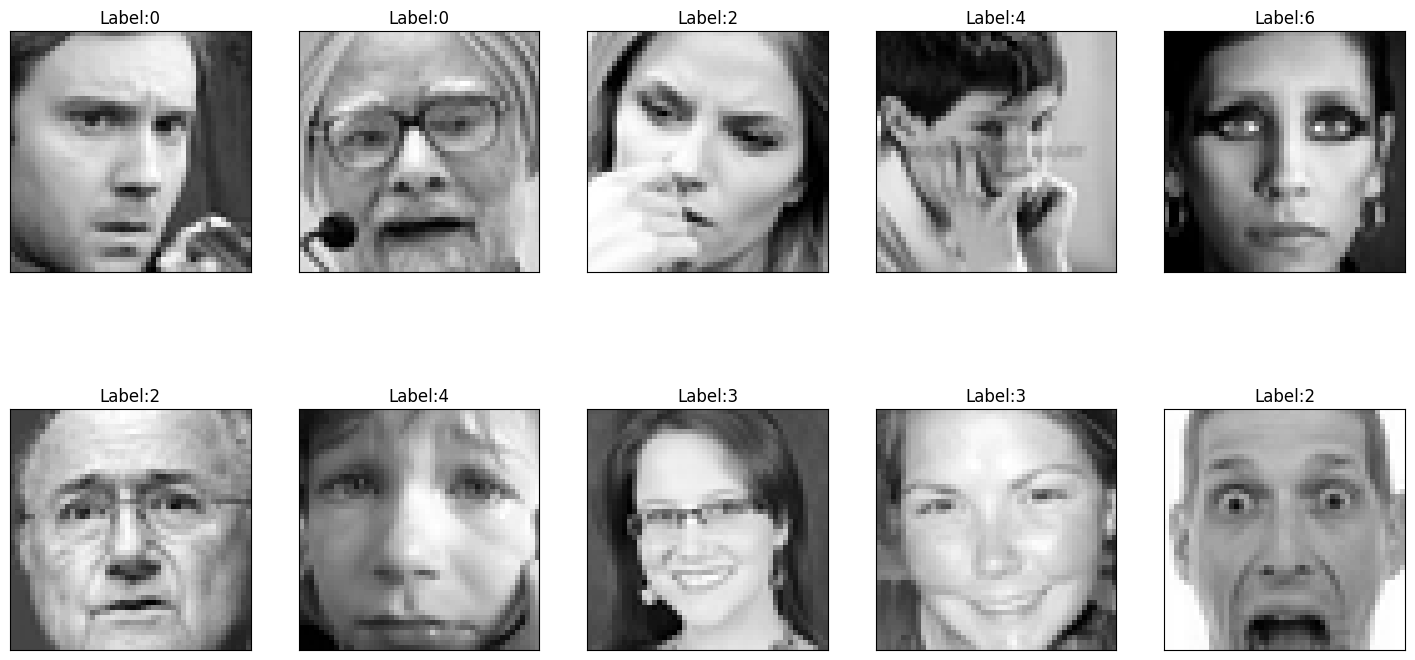

In [12]:
## showing images here
show_img(images, labels)

### Preprocessing

In [13]:
# make the dataset to an array of images of pixels
image_array =[]
for i, row in enumerate(df.index):
        image = np.fromstring(df.loc[row, 'pixels'], dtype=int, sep=' ')
        image_array.append(image.flatten())

In [14]:
image_array

[array([ 70,  80,  82, ..., 106, 109,  82]),
 array([151, 150, 147, ..., 193, 183, 184]),
 array([231, 212, 156, ...,  88, 110, 152]),
 array([ 24,  32,  36, ..., 142, 143, 142]),
 array([ 4,  0,  0, ..., 30, 29, 30]),
 array([55, 55, 55, ..., 34, 30, 57]),
 array([ 20,  17,  19, ...,  99, 107, 118]),
 array([ 77,  78,  79, ..., 125,  67,  68]),
 array([85, 84, 90, ..., 58, 73, 84]),
 array([255, 254, 255, ..., 254, 255, 255]),
 array([ 30,  24,  21, ..., 172, 173, 173]),
 array([39, 75, 78, ..., 84, 83, 87]),
 array([219, 213, 206, ...,   0,   0,   0]),
 array([148, 144, 130, ..., 112, 111, 111]),
 array([ 4,  2, 13, ...,  3,  7, 12]),
 array([107, 107, 109, ...,  83,  84, 106]),
 array([14, 14, 18, ...,  9, 10, 10]),
 array([255, 255, 255, ...,  79,  79,  83]),
 array([134, 124, 167, ...,  34,  28, 139]),
 array([219, 192, 179, ...,  57,  39,  40]),
 array([  1,   1,   1, ..., 213, 211, 215]),
 array([174,  51,  37, ...,   7,  11,  16]),
 array([123, 125, 124, ...,  97,  91,  89]),
 

In [15]:
image_array[0].shape

(2304,)

In [16]:
labels = np.array(df['emotion']).tolist()

In [17]:
print('labels: ',len(labels))
print('images: ',len(image_array))

labels:  35887
images:  35887


Check zero array

In [18]:
# Check array with full of zeros
def check_zero_images(arrays):
    zero_arrays_indices = []
    for idx, arr in enumerate(arrays):
        if np.all(arr == 0):
            zero_arrays_indices.append(idx)
    return zero_arrays_indices

In [19]:
list_zero = check_zero_images(image_array)
list_zero

[6458,
 7629,
 10423,
 11286,
 13148,
 13402,
 13988,
 15894,
 22198,
 22927,
 28601,
 30002]

Eliminate all zero images

In [20]:
# remove zero arrays
image_array = [arr for idx, arr in enumerate(image_array) if idx not in list_zero]
labels = [label for idx, label in enumerate(labels) if idx not in list_zero]

In [21]:
print('labels: ',len(labels))
print('images: ',len(image_array))

labels:  35875
images:  35875


Normalize pixel values

In [22]:
flat_images = np.array(image_array)
target = np.array(labels)

# normalization
flat_images = flat_images / 255

In [23]:
# convert into a dataframe
final_df = pd.DataFrame(flat_images)
final_df['target'] = target

In [24]:
final_df

,0,1,2,3,4,5,6,7,8,9,...,2295,2296,2297,2298,2299,2300,2301,2302,2303,target
0,0.274510,0.313725,0.321569,0.282353,0.227451,0.227451,0.235294,0.247059,0.211765,0.227451,...,0.713725,0.717647,0.533333,0.415686,0.454902,0.372549,0.415686,0.427451,0.321569,0
1,0.592157,0.588235,0.576471,0.607843,0.580392,0.521569,0.435294,0.549020,0.666667,0.682353,...,0.423529,0.372549,0.423529,0.400000,0.262745,0.670588,0.756863,0.717647,0.721569,0
2,0.905882,0.831373,0.611765,0.643137,0.682353,0.541176,0.631373,0.678431,0.713725,0.784314,...,0.541176,0.596078,0.478431,0.447059,0.396078,0.380392,0.345098,0.431373,0.596078,2
3,0.094118,0.125490,0.141176,0.117647,0.125490,0.090196,0.074510,0.078431,0.117647,0.160784,...,0.494118,0.517647,0.517647,0.521569,0.533333,0.545098,0.556863,0.560784,0.556863,4
4,0.015686,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.133333,0.121569,0.121569,0.121569,0.105882,0.121569,0.117647,0.113725,0.117647,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35870,0.196078,0.141176,0.066667,0.086275,0.090196,0.113725,0.129412,0.152941,0.133333,0.145098,...,0.843137,0.847059,0.850980,0.866667,0.870588,0.862745,0.874510,0.866667,0.847059,6
35871,0.698039,0.682353,0.674510,0.678431,0.709804,0.737255,0.749020,0.760784,0.768627,0.780392,...,0.552941,0.533333,0.462745,0.258824,0.027451,0.000000,0.000000,0.000000,0.000000,3
35872,0.066667,0.066667,0.062745,0.090196,0.109804,0.086275,0.074510,0.066667,0.098039,0.101961,...,0.701961,0.756863,0.756863,0.760784,0.666667,0.580392,0.603922,0.521569,0.443137,0
35873,0.117647,0.109804,0.109804,0.113725,0.121569,0.117647,0.164706,0.266667,0.309804,0.317647,...,0.105882,0.105882,0.101961,0.109804,0.137255,0.137255,0.137255,0.117647,0.109804,3


<ipython-input-25-a891dd2fe31a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='target', data=final_df, palette='viridis')


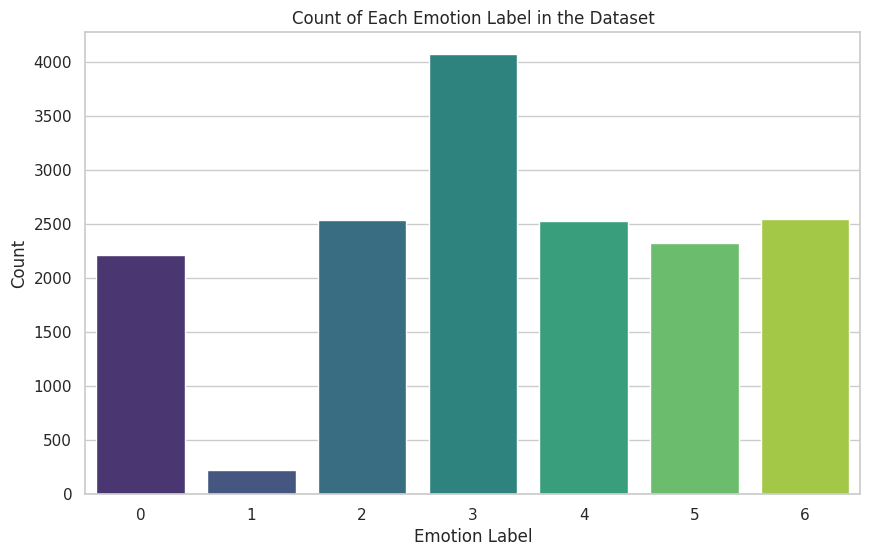

In [25]:
sns.set(style="whitegrid")

# Calculate the number of each labels
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='target', data=final_df, palette='viridis')
ax.set_title('Count of Each Emotion Label in the Dataset')
ax.set_xlabel('Emotion Label')
ax.set_ylabel('Count')

plt.show()

Here are some observations:
- **Class Imbalance:** The dataset has an imbalance among the different emotion labels. This can affect model performance, especially if certain emotions are underrepresented.
- **Most Frequent Label:** Emotion label 3 is the most frequent, with over 4000 instances. This suggests that this emotion is more prevalent in the dataset, which might lead the model to have better accuracy in predicting this label.
- **Least Frequent Label**: Emotion label 1 is the least frequent, with very few instances. This extreme imbalance could lead to poor model performance for this label, as the model may not have enough examples to learn from.
- **Moderate Representation**: Labels 0, 2, 4, 5, and 6 have relatively moderate representation, with counts ranging between 2000 and 3000. These labels have a more balanced distribution compared to labels 1 and 3.
- **Implications for Model Training**: The imbalance, particularly the underrepresentation of label 1, may lead to biased predictions where the model favors the more frequent labels.

Split data

In [26]:
X = final_df.drop('target', axis=1)
y = final_df['target']

### Feature Extraction using HOG

Histogram of Oriented Gradients (HOG) is a feature descriptor used in computer vision and image processing for the purpose of object detection. We will apply this technique for feature extraction because it offers several key advantages:

- The HOG descriptor is able to capture the local shape and texture information of an image by computing the distribution of intensity gradients, providing a rich representation of the visual features.
- The HOG features are relatively invariant to changes in illumination and small deformations or translations of the object, making them robust to common image variations.
- The HOG algorithm can be implemented efficiently, with fast processing times, making it feasible to use in real-time applications or on resource-constrained hardware.
- The HOG descriptor has been extensively studied and validated in the computer vision literature, with a proven track record of success across a wide range of applications.
These advantages - the informative feature representation, the robustness, the computational efficiency, and the widespread adoption - make HOG an ideal choice for feature extraction in our project.

In [27]:
from skimage import color, feature, exposure
from skimage.feature import hog

class HOGFeatureExtractor:
    def __init__(self):
        pass

    def extract_hog_features(self, image):
        """
        Extract HOG features from a given image.

        Parameters:
        image (numpy.ndarray): The input image in grayscale.

        Returns:
        tuple: HOG features and the rescaled HOG image for visualization.
        """
        gray_image = image  # Assuming the image is already in grayscale

        # Calculate HOG features
        hog_features, hog_image = hog(gray_image, visualize=True)

        # Enhance the contrast of the HOG image for better visualization
        hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

        return hog_features, hog_image_rescaled

    def extract_features_from_dataframe(self, X):
        """
        Extract HOG features from all images in a DataFrame.

        Parameters:
        X (pandas.DataFrame): DataFrame where each row is a flattened grayscale image.

        Returns:
        tuple: Numpy array of HOG features for each image and a list of rescaled HOG images.
        """
        hog_features_list = []
        hog_images = []

        # Iterate over each row in the DataFrame
        for index, row in X.iterrows():
            # Reshape the row values back to the original image shape (48x48 pixels)
            image_pixels = row.values.reshape(48, 48)

            # Extract HOG features and the HOG image
            hog_features, hog_image = self.extract_hog_features(image_pixels)

            # Append the extracted features and HOG image to the respective lists
            hog_features_list.append(hog_features)
            hog_images.append(hog_image)

        # Convert the list of HOG features to a numpy array
        hog_features_array = np.array(hog_features_list)

        return hog_features_array, hog_images

In [28]:
# Create an instance of HOGFeatureExtractor and extract HOG features
extractor = HOGFeatureExtractor()
hog_features_array, hog_images = extractor.extract_features_from_dataframe(X)

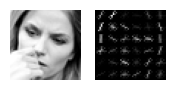

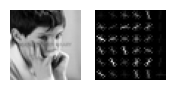

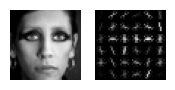

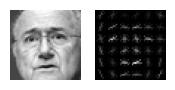

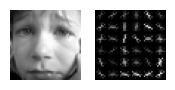

In [29]:
# Plot some images before and after hog
for i in range(2, 7):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(2,1), sharex=True, sharey=True)
    ax1.axis('off')
    ax1.imshow(image_array[i].reshape(48, 48), cmap=plt.cm.gray)
    ax2.axis('off')
    ax2.imshow(hog_images[i], cmap=plt.cm.gray)
    plt.show()

- The image on the left appears to be a portrait photograph of a person, likely an older male. This type of image would typically contain a lot of detailed visual information about the individual's facial features, textures, and lighting.

- The image on the right appears to be a visualization or plot of the Histogram of Oriented Gradients (HOG) features extracted from the original image on the left. HOG is a feature descriptor used in computer vision to capture the distribution of intensity gradients in an image. This plot represents the HOG features, which provide a compact and useful representation of the local shape and texture information in the original image, without identifying any specific individuals.

In [30]:
hog_features_array.shape

(35875, 1296)

In [31]:
X = hog_features_array
y = final_df['target'].values

## 2. Principle Component Analysis

Unsupervised learning can be further categorized into two main tasks: data transformation and clustering. In this study, we will focus on data transformation using unsupervised learning techniques. These techniques aim to modify the data to make it easier for computers and humans to analyze and understand.

One of the most common applications of unsupervised data transformation is dimensionality reduction. This process reduces the number of features (dimensions) in the data. When the data has a high number of features, it can be computationally expensive and difficult to analyze. Dimensionality reduction techniques help to overcome these challenges.

Principal Component Analysis (PCA) is a popular technique for dimensionality reduction. It transforms the data into a new set of features called principal components (PCs). These PCs are ordered by their importance, capturing the most significant variations in the data. By selecting a subset of the most informative PCs, we can achieve a significant reduction in data size while preserving the essential information for analysis.

**Question 1: Can you visualize the data projected onto two principal components? (2 points)**

In [32]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

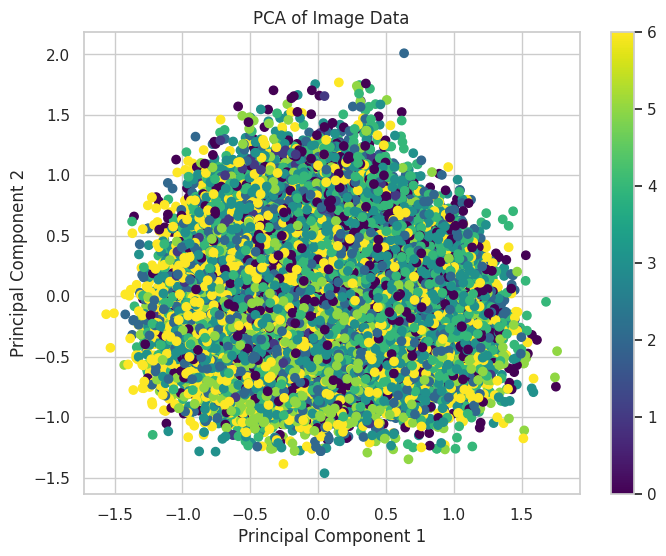

Explained Variance Ratio of PC1: 5.14%
Explained Variance Ratio of PC2: 3.64%


In [33]:
# PCA with 2 principal components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
df_pca['target'] = y

# Visualize the PCA results
plt.figure(figsize=(8, 6))
scatter = plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['target'], cmap='viridis')
plt.colorbar(scatter)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Image Data')
plt.show()

# explained variance ratio of PC1 and PC2
explained_variance_ratio = pca.explained_variance_ratio_
print(f"Explained Variance Ratio of PC1: {explained_variance_ratio[0]*100:.2f}%")
print(f"Explained Variance Ratio of PC2: {explained_variance_ratio[1]*100:.2f}%")

**Question 2: How to determine the optimal number of principal components using ```pca.explained_variance_```? Explain your selection process. (2 points)**

**Initialization and Fitting:**

- The PCAAnalyzer class is initialized with desired variance thresholds (80%, 90%, and 95%).

- The fit method is called on the `hog_features_array` data, performing PCA and calculating the cumulative explained variance.

**Getting the Optimal Number of Components:**

- The get_components method returns a dictionary where the keys are the variance thresholds and the values are the number of components required to reach those thresholds.

- This provides a clear understanding of how many components are needed to capture a significant amount of variance.

**Plotting the Explained Variance:**

- The `plot_explained_variance` method visualizes the cumulative explained variance and the specified thresholds, helping to *identify the optimal number of components* visually.

In [34]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

class PCAAnalyzer:
    def __init__(self, variance_thresholds=[0.80, 0.90, 0.95]):
        """
        Initialize PCAAnalyzer with desired variance thresholds.

        Parameters:
        variance_thresholds (list): List of desired explained variance thresholds.
        """
        self.variance_thresholds = variance_thresholds
        self.pca = PCA()
        self.cumulative_explained_variance = None
        self.components = {}

    def fit(self, X):
        """
        Perform PCA on the data.

        Parameters:
        X (array-like): Input data to perform PCA on.
        """
        # Perform PCA
        X_pca = self.pca.fit_transform(X)

        # Calculate cumulative explained variance
        self.cumulative_explained_variance = self.pca.explained_variance_ratio_.cumsum()

        # Determine the number of principal components to reach each variance threshold
        for threshold in self.variance_thresholds:
            self.components[threshold] = next(i for i, total in enumerate(self.cumulative_explained_variance, 1) if total >= threshold)

    def get_components(self):
        """
        Return the number of principal components to reach each variance threshold.

        Returns:
        components (dict): Number of principal components to reach each variance threshold.
        """
        return self.components

    def plot_explained_variance(self):
        """
        Plot the explained variance percentage.

        Raises:
        ValueError: If PCA has not been performed yet.
        """
        if self.cumulative_explained_variance is None:
            raise ValueError("PCA has not been performed. Please call the 'fit' method first.")

        plt.figure(figsize=(8, 6))
        plt.plot(range(1, len(self.pca.explained_variance_ratio_) + 1), self.cumulative_explained_variance, marker='o', linestyle='--')
        for threshold in self.variance_thresholds:
            plt.axhline(y=threshold, linestyle='--', label=f'{int(threshold*100)}% threshold')
        plt.xlabel('Number of Principal Components')
        plt.ylabel('Cumulative Explained Variance')
        plt.title('Explained Variance by Principal Components')
        plt.legend()
        plt.grid()
        plt.show()

**Selection Process:**

- **Threshold-Based Selection**: By setting and analyzing thresholds like 80%, 90%, or 95%, you ensure that the selected number of components captures a substantial proportion of the variance, balancing dimensionality reduction and information retention.

- **Elbow Method**: The scree plot's "elbow" point indicates where adding more components contributes less to the explained variance, suggesting an optimal cut-off for the number of components.

Number of principal components to reach 80% explained variance: 125
Number of principal components to reach 90% explained variance: 186
Number of principal components to reach 95% explained variance: 237


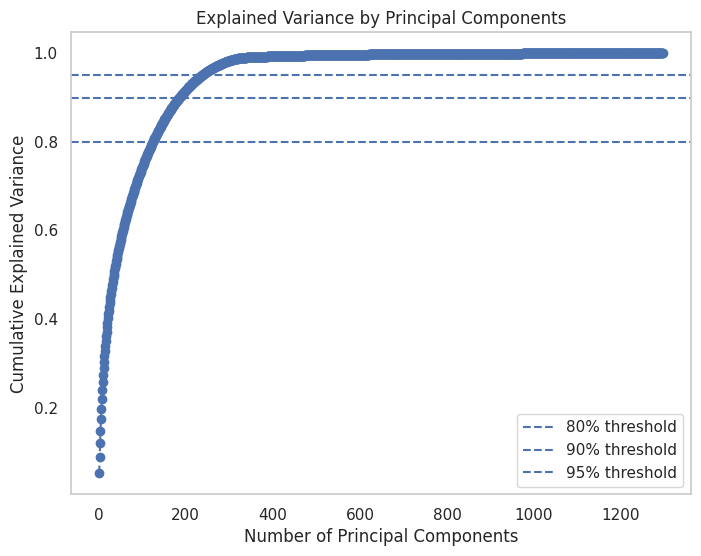

In [35]:
# Use the PCAAnalyzer class
pca_analyzer = PCAAnalyzer()
pca_analyzer.fit(X)

# Get the number of principal components to reach each variance threshold
components = pca_analyzer.get_components()
for threshold, num_components in components.items():
    print(f"Number of principal components to reach {int(threshold*100)}% explained variance: {num_components}")

# Plot the explained variance percentage
pca_analyzer.plot_explained_variance()


After all, we choose 237 principal components to reach 95% explained variance.

## 3. Image Classification

The classification task will compare the performance using both:

- Original data: The data before applying PCA.
- Transformed data: The data projected onto the optimal number of principal components identified earlier. Utilize the **optimal number of principal components** identified in the previous question.

Compare the performance of **4** different classification algorithms (3 machine learning and 1 MLP models) in both formats above. (4 points)

Perform hyperparameter tuning using ```GridSearchCV``` for each classification method. (1 point)

Inspiration: Draw inspiration from the example provided in the scikit-learn documentation: https://scikit-learn.org/dev/auto_examples/datasets/plot_iris_dataset.html

In [36]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [37]:
## splitting data into train/val/test subsets here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

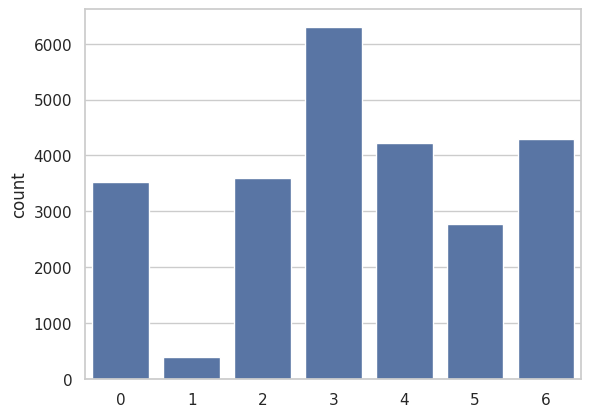

In [38]:
sns.countplot(x=y_train)
print()

We will use 4 models (3 machine learning models and 1 deep learning model) for classification: XGBoost, KNN, LightGBM, and MLP.

- XGBoost: A powerful and efficient gradient boosting algorithm known for high performance and speed.

- KNN (K-Nearest Neighbors): A simple algorithm that classifies data points based on the labels of their nearest neighbors.

- LightGBM: A fast and memory-efficient gradient boosting framework designed for large datasets.

- MLP (Multilayer Perceptron): A type of deep learning model with multiple layers of neurons, used for learning complex patterns.

We will train these models on both the original data and the data transformed using PCA (Principal Component Analysis). PCA is a dimensionality reduction technique that helps to reduce the complexity of the data, potentially improving the performance and training time of our models. By comparing the performance of the models on the original and PCA-transformed data, we can evaluate the effectiveness of PCA in enhancing the classification results.

### Original data

#### XGBoost

In [ ]:
# XGBoost Classifier
xgb = XGBClassifier()

# Define grid parameters
grid_params = {
    'n_estimators': [100, 150]
}

# GridSearchCV
xgb_grid = GridSearchCV(xgb, grid_params, cv=5, scoring='accuracy', n_jobs=-1)
xgb_grid.fit(X_train, y_train)

model_eval = {
    'model_name': 'XGBoost',
    'model': xgb_grid,
}

#### KNN

In [ ]:
# KNN
knn = KNeighborsClassifier()

# Define grid parameters
grid_params = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# GridSearchCV
knn_grid = GridSearchCV(knn, grid_params, cv=5, scoring='accuracy', n_jobs=-1)
knn_grid.fit(X_train, y_train)

model_eval = {
    'model_name': 'KNN',
    'model': knn_grid,
}

#### LightGBM

In [ ]:
# LightGBM Classifier
lgbm = LGBMClassifier(boosting_type='gbdt', objective='multiclass', num_classes=7, verbose=-1)

# Define grid parameters
grid_params = {
    'n_estimators': [100, 200],
    'num_leaves': [31, 50],
    'learning_rate': [0.05, 0.1]
}

# GridSearchCV
lgbm_grid = GridSearchCV(lgbm, grid_params, cv=5, scoring='accuracy', n_jobs=-1)
lgbm_grid.fit(X_train, y_train)

model_eval = {
    'model_name': 'LightGBM',
    'model': lgbm_grid,
}

#### Multi layer Perceptron

In [40]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, Dataset
from tqdm import tqdm

Create a simple dataloader to transform data into tensor and load batch

In [41]:
class ImagesDataset(Dataset):
  def __init__(self, features, labels):
    self.features = torch.tensor(features, dtype=torch.float32)
    self.labels = torch.tensor(labels, dtype=torch.long)

  def __len__(self):
    return len(self.features)

  def __getitem__(self, index):
    return self.features[index], self.labels[index]

Some simple Linear layer and high neurons with dropout in order to avoid overfitting after training

In [42]:
class MLPModel(nn.Module):
    def __init__(self, input_size, num_classes, dropout_rate):
        super(MLPModel, self).__init__()
        self.fc1 = nn.Linear(input_size, 256) #256 - 128
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(dropout_rate)
        self.fc2 = nn.Linear(256, 128)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(dropout_rate)
        self.fc3 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.dropout1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.dropout2(x)
        x = self.fc3(x)
        return x

In [43]:
# Set training param and create
EPOCHS = 25
batch_size = 32
dropout_rate = 0.2

In [44]:
# Create dataset and data loader
train_dataset = ImagesDataset(X_train, y_train)
test_dataset = ImagesDataset(X_test, y_test)


train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [45]:
input_size = X_train.shape[1]
num_classes = len(np.unique(y_train))
mlp = MLPModel(input_size, num_classes, dropout_rate)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
mlp.to(device)

MLPModel(
  (fc1): Linear(in_features=1296, out_features=256, bias=True)
  (relu1): ReLU()
  (dropout1): Dropout(p=0.2, inplace=False)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (relu2): ReLU()
  (dropout2): Dropout(p=0.2, inplace=False)
  (fc3): Linear(in_features=128, out_features=7, bias=True)
)

In [46]:
def training(model, data_loader, optimizer, criterion, device):
  """
  Training and evaluate the loss and accuracy
  """
  model.train()
  epoch_loss = 0
  correct = 0
  for X_batch, y_batch in data_loader:
      X_batch, y_batch = X_batch.to(device), y_batch.to(device)
      optimizer.zero_grad()
      outputs = model(X_batch)
      loss = criterion(outputs, y_batch)
      _, pred = torch.max(outputs, dim=1)
      correct += torch.sum(pred == y_batch)
      loss.backward()
      optimizer.step()
      epoch_loss += loss.item()
  return epoch_loss / len(data_loader), correct.double() / len(data_loader.dataset)

In [47]:
# training
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(mlp.parameters(), lr=0.001)

for epoch in tqdm(range(EPOCHS)):
  train_loss, train_accuracy = training(
      model=mlp,
      data_loader=train_loader,
      optimizer=optimizer,
      criterion=criterion,
      device=device
  )
  print(f"\tTrain Loss: {train_loss:7.3f} | Train accuracy: {train_accuracy:7.3f}")

  4%|▍         | 1/25 [00:05<02:22,  5.96s/it]

	Train Loss:   1.588 | Train accuracy:   0.374


  8%|▊         | 2/25 [00:14<02:45,  7.21s/it]

	Train Loss:   1.474 | Train accuracy:   0.426


 12%|█▏        | 3/25 [00:22<02:51,  7.81s/it]

	Train Loss:   1.434 | Train accuracy:   0.441


 16%|█▌        | 4/25 [00:30<02:43,  7.77s/it]

	Train Loss:   1.402 | Train accuracy:   0.458


 20%|██        | 5/25 [00:38<02:40,  8.04s/it]

	Train Loss:   1.381 | Train accuracy:   0.463


 24%|██▍       | 6/25 [00:47<02:35,  8.20s/it]

	Train Loss:   1.354 | Train accuracy:   0.478


 28%|██▊       | 7/25 [00:55<02:25,  8.11s/it]

	Train Loss:   1.332 | Train accuracy:   0.481


 32%|███▏      | 8/25 [01:03<02:20,  8.26s/it]

	Train Loss:   1.305 | Train accuracy:   0.496


 36%|███▌      | 9/25 [01:11<02:10,  8.13s/it]

	Train Loss:   1.285 | Train accuracy:   0.506


 40%|████      | 10/25 [01:21<02:10,  8.72s/it]

	Train Loss:   1.262 | Train accuracy:   0.515


 44%|████▍     | 11/25 [01:30<02:01,  8.70s/it]

	Train Loss:   1.240 | Train accuracy:   0.524


 48%|████▊     | 12/25 [01:38<01:49,  8.46s/it]

	Train Loss:   1.219 | Train accuracy:   0.534


 52%|█████▏    | 13/25 [01:46<01:41,  8.49s/it]

	Train Loss:   1.201 | Train accuracy:   0.540


 56%|█████▌    | 14/25 [01:55<01:33,  8.52s/it]

	Train Loss:   1.179 | Train accuracy:   0.548


 60%|██████    | 15/25 [02:03<01:22,  8.27s/it]

	Train Loss:   1.167 | Train accuracy:   0.553


 64%|██████▍   | 16/25 [02:11<01:15,  8.35s/it]

	Train Loss:   1.147 | Train accuracy:   0.561


 68%|██████▊   | 17/25 [02:20<01:07,  8.50s/it]

	Train Loss:   1.131 | Train accuracy:   0.568


 72%|███████▏  | 18/25 [02:28<00:58,  8.35s/it]

	Train Loss:   1.117 | Train accuracy:   0.575


 76%|███████▌  | 19/25 [02:36<00:50,  8.37s/it]

	Train Loss:   1.099 | Train accuracy:   0.584


 80%|████████  | 20/25 [02:44<00:40,  8.16s/it]

	Train Loss:   1.092 | Train accuracy:   0.585


 84%|████████▍ | 21/25 [02:53<00:33,  8.27s/it]

	Train Loss:   1.076 | Train accuracy:   0.590


 88%|████████▊ | 22/25 [03:01<00:24,  8.31s/it]

	Train Loss:   1.061 | Train accuracy:   0.592


 92%|█████████▏| 23/25 [03:09<00:16,  8.14s/it]

	Train Loss:   1.059 | Train accuracy:   0.593


 96%|█████████▌| 24/25 [03:20<00:09,  9.22s/it]

	Train Loss:   1.039 | Train accuracy:   0.604


100%|██████████| 25/25 [03:29<00:00,  8.38s/it]

	Train Loss:   1.030 | Train accuracy:   0.607


In [48]:
# Evaluate model
def eval(model, criterion, test_loader, device):
  """
  Model validation
  """
  model.eval()
  losses = []
  correct = 0
  all_preds = []
  all_labels = []

  with torch.no_grad():
    for x_batch, y_batch in test_loader:
      x_batch, y_batch = x_batch.to(device), y_batch.to(device)
      outputs = model(x_batch)
      _, preds = torch.max(outputs, dim=1)

      loss = criterion(outputs, y_batch)
      correct += torch.sum(preds == y_batch)
      losses.append(loss.item())

      all_preds.extend(preds.cpu().numpy())
      all_labels.extend(y_batch.cpu().numpy())

  accuracy = correct.double() / len(test_loader.dataset)
  avg_loss = np.mean(losses)
  return accuracy, avg_loss, all_preds, all_labels

In [49]:
test_accuracy, test_loss, y_pred, y_true = eval(
    model=mlp,
    criterion=criterion,
    device=device,
    test_loader=test_loader
)
print(f"\tTest Loss: {test_loss:7.3f} | Test accuracy: {test_accuracy:7.3f}")

	Test Loss:   1.421 | Test accuracy:   0.490


In [50]:
print(classification_report(y_pred, y_true))

              precision    recall  f1-score   support

           0       0.31      0.38      0.34      1146
           1       0.32      0.42      0.36       122
           2       0.31      0.37      0.34      1268
           3       0.74      0.63      0.68      3127
           4       0.39      0.38      0.39      1901
           5       0.53      0.70      0.61       939
           6       0.51      0.43      0.46      2260

    accuracy                           0.49     10763
   macro avg       0.44      0.47      0.45     10763
weighted avg       0.51      0.49      0.50     10763



### PCA data

In [51]:
pca = PCA(n_components=237)
train_images_pca = pca.fit_transform(X_train) ## modify images' array to the appropriate shape
test_images_pca = pca.transform(X_test)
train_images_pca.shape

(25112, 237)

#### XGBoost

In [ ]:
# XGBoost Classifier
xgb_pca = XGBClassifier()

# Define grid parameters
grid_params = {
    'n_estimators': [100, 150],
}
# GridSearchCV
xgb_grid_pca = GridSearchCV(xgb_pca, grid_params, cv=5, scoring='accuracy', n_jobs=-1)
xgb_grid_pca.fit(train_images_pca, y_train)

model_eval = {
    'model_name': 'XGBoost_PCA',
    'model': xgb_grid_pca,
}

#### KNN

In [ ]:
# KNN
knn_pca = KNeighborsClassifier()

# Train model
grid_params = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn_grid_pca = GridSearchCV(knn_pca, grid_params, cv=5, scoring='accuracy', n_jobs=-1)
knn_grid_pca.fit(train_images_pca, y_train)

model_eval = {
    'model_name': 'KNN_PCA',
    'model': knn_grid_pca,
}

#### LightGBM Classifier

In [ ]:
# LightGBM Classifier
lgbm_pca = LGBMClassifier(boosting_type='gbdt', objective='multiclass', num_classes=7, verbose=-1)

# Define grid parameters
grid_params = {
    'n_estimators': [100, 200],
    'num_leaves': [31, 50],
    'learning_rate': [0.05, 0.1]
}

# GridSearchCV
lgbm_grid_pca = GridSearchCV(lgbm_pca, grid_params, cv=5, scoring='accuracy', n_jobs=-1)
lgbm_grid_pca.fit(train_images_pca, y_train)

model_eval = {
    'model_name': 'LightGBM_PCA',
    'model': lgbm_grid_pca,
}

#### Multi Layer Perceptron

In [52]:
# Set training param and create
EPOCHS = 20
batch_size = 32
dropout_rate = 0.45

In [53]:
# Create dataset and data loader
train_dataset_pca = ImagesDataset(train_images_pca, y_train)
test_dataset_pca = ImagesDataset(test_images_pca, y_test)


train_loader_pca = DataLoader(train_dataset_pca, batch_size=batch_size, shuffle=True)
test_loader_pca = DataLoader(test_dataset_pca, batch_size=batch_size, shuffle=False)

In [54]:
input_size = train_images_pca.shape[1]
num_classes = len(np.unique(y_train))
mlp_pca = MLPModel(input_size, num_classes, dropout_rate)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
mlp_pca.to(device)

MLPModel(
  (fc1): Linear(in_features=237, out_features=256, bias=True)
  (relu1): ReLU()
  (dropout1): Dropout(p=0.45, inplace=False)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (relu2): ReLU()
  (dropout2): Dropout(p=0.45, inplace=False)
  (fc3): Linear(in_features=128, out_features=7, bias=True)
)

In [55]:
# training
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(mlp_pca.parameters(), lr=0.001)

for epoch in tqdm(range(EPOCHS)):
  train_loss, train_accuracy = training(
      model=mlp_pca,
      data_loader=train_loader_pca,
      optimizer=optimizer,
      criterion=criterion,
      device=device
  )
  print(f"\tTrain Loss: {train_loss:7.3f} | Train accuracy: {train_accuracy:7.3f}")

  5%|▌         | 1/20 [00:03<01:04,  3.38s/it]

	Train Loss:   1.571 | Train accuracy:   0.380


 10%|█         | 2/20 [00:06<00:56,  3.15s/it]

	Train Loss:   1.426 | Train accuracy:   0.451


 15%|█▌        | 3/20 [00:09<00:53,  3.15s/it]

	Train Loss:   1.365 | Train accuracy:   0.480


 20%|██        | 4/20 [00:12<00:48,  3.03s/it]

	Train Loss:   1.308 | Train accuracy:   0.501


 25%|██▌       | 5/20 [00:15<00:47,  3.18s/it]

	Train Loss:   1.268 | Train accuracy:   0.517


 30%|███       | 6/20 [00:18<00:40,  2.91s/it]

	Train Loss:   1.219 | Train accuracy:   0.539


 35%|███▌      | 7/20 [00:20<00:35,  2.72s/it]

	Train Loss:   1.182 | Train accuracy:   0.553


 40%|████      | 8/20 [00:22<00:31,  2.60s/it]

	Train Loss:   1.145 | Train accuracy:   0.569


 45%|████▌     | 9/20 [00:25<00:27,  2.54s/it]

	Train Loss:   1.110 | Train accuracy:   0.582


 50%|█████     | 10/20 [00:28<00:26,  2.70s/it]

	Train Loss:   1.086 | Train accuracy:   0.590


 55%|█████▌    | 11/20 [00:31<00:24,  2.73s/it]

	Train Loss:   1.055 | Train accuracy:   0.603


 60%|██████    | 12/20 [00:33<00:21,  2.63s/it]

	Train Loss:   1.033 | Train accuracy:   0.610


 65%|██████▌   | 13/20 [00:35<00:17,  2.53s/it]

	Train Loss:   1.004 | Train accuracy:   0.622


 70%|███████   | 14/20 [00:38<00:14,  2.47s/it]

	Train Loss:   0.982 | Train accuracy:   0.631


 75%|███████▌  | 15/20 [00:40<00:12,  2.56s/it]

	Train Loss:   0.965 | Train accuracy:   0.641


 80%|████████  | 16/20 [00:43<00:10,  2.70s/it]

	Train Loss:   0.948 | Train accuracy:   0.644


 85%|████████▌ | 17/20 [00:46<00:07,  2.63s/it]

	Train Loss:   0.929 | Train accuracy:   0.649


 90%|█████████ | 18/20 [00:48<00:05,  2.58s/it]

	Train Loss:   0.920 | Train accuracy:   0.655


 95%|█████████▌| 19/20 [00:51<00:02,  2.53s/it]

	Train Loss:   0.897 | Train accuracy:   0.663


100%|██████████| 20/20 [00:54<00:00,  2.72s/it]

	Train Loss:   0.880 | Train accuracy:   0.671


In [56]:
test_accuracy, test_loss, y_pred_pca, y_true_pca = eval(
    model=mlp_pca,
    criterion=criterion,
    device=device,
    test_loader=test_loader_pca
)
print(f"\tTest Loss: {test_loss:7.3f} | Test accuracy: {test_accuracy:7.3f}")

	Test Loss:   1.429 | Test accuracy:   0.501


In [57]:
print(classification_report(y_pred, y_true))

              precision    recall  f1-score   support

           0       0.31      0.38      0.34      1146
           1       0.32      0.42      0.36       122
           2       0.31      0.37      0.34      1268
           3       0.74      0.63      0.68      3127
           4       0.39      0.38      0.39      1901
           5       0.53      0.70      0.61       939
           6       0.51      0.43      0.46      2260

    accuracy                           0.49     10763
   macro avg       0.44      0.47      0.45     10763
weighted avg       0.51      0.49      0.50     10763



### Model Saving

In [ ]:
def model_saving(models):
    for model_name, model in models.items():
      with open(f"{model_name}_model.pkl", 'wb') as model_file:
          pickle.dump(model['model'], model_file)

In [ ]:
# save model_pkl
models = {
    'XGBoost': {'model_name': 'XGBoost', 'model': xgb_grid},
    'KNN': {'model_name': 'KNN', 'model': knn_grid},
    'LightGBM': {'model_name': 'LightGBM', 'model': lgbm_grid},
    'XGBoost_PCA': {'model_name': 'XGBoost_PCA', 'model': xgb_grid_pca},
    'KNN_PCA': {'model_name': 'KNN_PCA', 'model': knn_grid_pca},
    'LightGBM_PCA': {'model_name': 'LightGBM_PCA', 'model': lgbm_grid_pca}
}
model_saving(models)

## 4. Evaluating Classification Performance

Compare the performance of the different classification models using various metrics: accuracy, precision, recall, and F1-score.
Based on the evaluation metrics, explain which model performs best and why. Identify the emotion category where the model makes the most accurate and most errors. (1 point)



In [58]:
import pickle
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix as sklearn_confusion_matrix

def evaluate_model(model, X_test, y_test, model_name, y_pred=None):
    """
    Evaluate a single model and return a DataFrame with the evaluation metrics.
    """
    if not y_pred:
      y_pred = model.predict(X_test)

    # Compute overall metrics
    model_accuracy = accuracy_score(y_test, y_pred)
    model_precision = precision_score(y_test, y_pred, average='weighted')
    model_recall = recall_score(y_test, y_pred, average='weighted')
    model_f1 = f1_score(y_test, y_pred, average='weighted')

    # Compute per-class metrics
    report = classification_report(y_test, y_pred, output_dict=True)

    # Prepare the DataFrame
    rows = []
    for class_label, metrics in report.items():
        if class_label.isdigit():  # Only include actual class labels
            row = {
                'model': model_name,
                'class': class_label,
                'class precision': metrics['precision'],
                'class recall': metrics['recall'],
                'class f1': metrics['f1-score'],
                'model accuracy': model_accuracy,
                'model precision': model_precision,
                'model recall': model_recall,
                'model f1': model_f1
            }
            rows.append(row)

    return pd.DataFrame(rows)

def report(models: dict, X_test, y_test, to_csv=True, target_model=None, y_pred=None) -> pd.DataFrame:
    """
    Generate an evaluation report for the specified target model in the dictionary.

    Parameters:
    - models: dict, dictionary with model names as keys and trained models as values
    - X_test: array-like, test features
    - y_test: array-like, test labels
    - to_csv: bool, whether to save the report as a CSV file
    - target_model: str, name of the model to generate the report for

    Returns:
    - pd.DataFrame: DataFrame containing the evaluation metrics for the target model
    """
    results = []

    for model_name, model in models.items():
        if model_name == target_model:
            df = evaluate_model(model['model'], X_test, y_test, model_name, y_pred)
            results.append(df)

    final_df = pd.concat(results, ignore_index=True)
    return final_df

def summarize_report(models: dict, X_test, y_test, y_pred=None):
  result = []
  for key, value in models.items():
    if 'MLP' in key:
      df = report(models, X_test, y_test, y_pred=y_pred, target_model=key)
    else:
      df = report(models, X_test, y_test, target_model=key)
    result.append(df)
  final_result = pd.concat(result, ignore_index=True)
  return final_result

Confusion matrix

In [68]:
def plot_confusion_matrix(y_true, y_pred, classes, model_name, dataset_name):
    """Plot confusion matrix."""
    cm = sklearn_confusion_matrix(y_true, y_pred)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(10, 8))
    sns.heatmap(cm_normalized, annot=True, cmap='Blues', fmt=".2f", xticklabels=classes, yticklabels=classes)
    plt.title(f'Confusion Matrix for {model_name} ({dataset_name})')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

def plot_confusion_matrices(models, df, dataset_name, X_test, y_test, y_pred=None):
    # Plot confusion matrices
    classes = df['class'].unique()
    for model_name, model in models.items():
        if 'MLP' not in model_name:
            y_pred = model['model'].predict(X_test)
        plot_confusion_matrix(y_test, y_pred, classes, model_name, dataset_name)

Line chart

In [79]:
def plot_model_comparisons(df, dataset_name):
    """Plot comparison charts for model metrics."""
    # Pivot tables for precision, recall, và f1
    pivot_precision = df.pivot(index='class', columns='model', values='class precision')
    pivot_recall = df.pivot(index='class', columns='model', values='class recall')
    pivot_f1 = df.pivot(index='class', columns='model', values='class f1')

    # Plotting the line charts side by side for comparison
    fig, axes = plt.subplots(1, 3, figsize=(30, 8))

    pivot_precision.plot(ax=axes[0], marker='o')
    axes[0].set_title(f'Class Precision Comparison Between Models ({dataset_name})')
    axes[0].set_ylabel('Precision')
    axes[0].set_xlabel('Class')

    pivot_recall.plot(ax=axes[1], marker='o')
    axes[1].set_title(f'Class Recall Comparison Between Models ({dataset_name})')
    axes[1].set_ylabel('Recall')
    axes[1].set_xlabel('Class')

    pivot_f1.plot(ax=axes[2], marker='o')
    axes[2].set_title(f'Class F1 Score Comparison Between Models ({dataset_name})')
    axes[2].set_ylabel('F1 Score')
    axes[2].set_xlabel('Class')

    plt.tight_layout()
    plt.show()

Barplot

In [140]:
def plot_model_metrics(df, title):
    """
    Plots a bar chart comparing the performance metrics of multiple models.

    Parameters:
    df(pandas.DataFrame): The dataframe containing the model performance data.
    """
    model_col = [col for col in df.columns.tolist() if 'model' in col]
    df = df[model_col]
    df.drop_duplicates(inplace=True)

    # Compare models
    df_plot = df.copy()
    plt.figure(figsize=(12, 6))
    sns.barplot(x='model', y='value', hue='variable', data=pd.melt(df_plot, id_vars=['model'], value_vars=['model accuracy', 'model recall', 'model precision', 'model f1']))
    plt.xticks(rotation=45)
    plt.title('Comparison of Model Metrics {}'.format(title))
    plt.xlabel('Model')
    plt.ylabel('Metric Value')
    plt.legend(loc='upper left')
    plt.show()

## Evaluate on original data

In [60]:
models = {
    'XGBoost': {'model_name': 'xgb', 'model': xgb_grid},
    'KNN': {'model_name': 'knn', 'model': knn_grid},
    'LightGBM': {'model_name': 'lightgbm', 'model': lgbm_grid},
    'MLP': {'model_name': 'mlp', 'model': mlp}
}

final_report = summarize_report(models, X_test, y_true, y_pred=y_pred)

In [62]:
final_report

,model,class,class precision,class recall,class f1,model accuracy,model precision,model recall,model f1
0,XGBoost,0,0.393155,0.332862,0.360505,0.502648,0.503225,0.502648,0.495854
1,XGBoost,1,0.945946,0.217391,0.353535,0.502648,0.503225,0.502648,0.495854
2,XGBoost,2,0.404104,0.335958,0.366894,0.502648,0.503225,0.502648,0.495854
3,XGBoost,3,0.616893,0.761923,0.681780,0.502648,0.503225,0.502648,0.495854
4,XGBoost,4,0.365591,0.385529,0.375296,0.502648,0.503225,0.502648,0.495854
5,XGBoost,5,0.725610,0.582857,0.646446,0.502648,0.503225,0.502648,0.495854
6,XGBoost,6,0.457442,0.483176,0.469957,0.502648,0.503225,0.502648,0.495854
7,KNN,0,0.444147,0.351237,0.392265,0.515005,0.503337,0.515005,0.500550
8,KNN,1,0.485714,0.422360,0.451827,0.515005,0.503337,0.515005,0.500550
9,KNN,2,0.475836,0.335958,0.393846,0.515005,0.503337,0.515005,0.500550


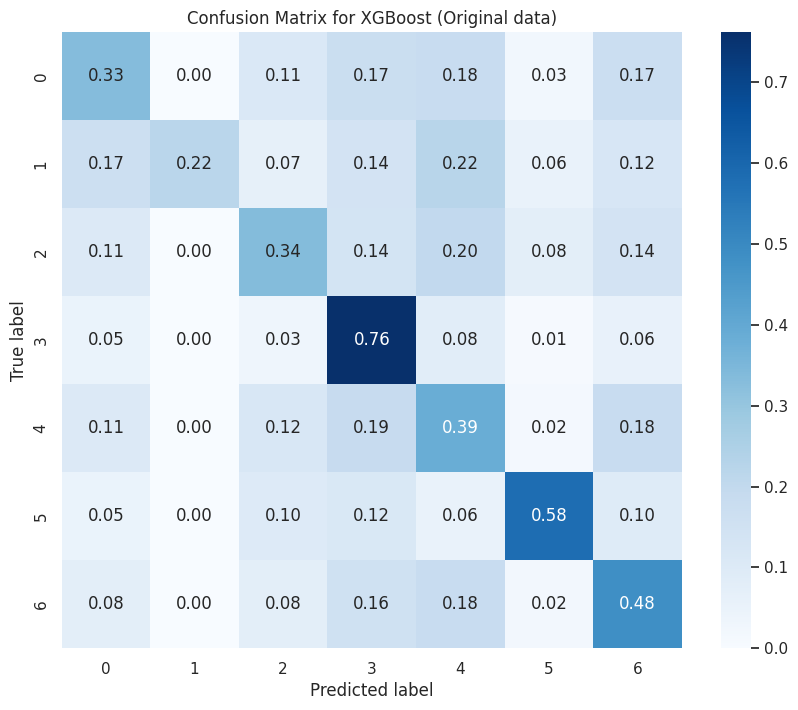

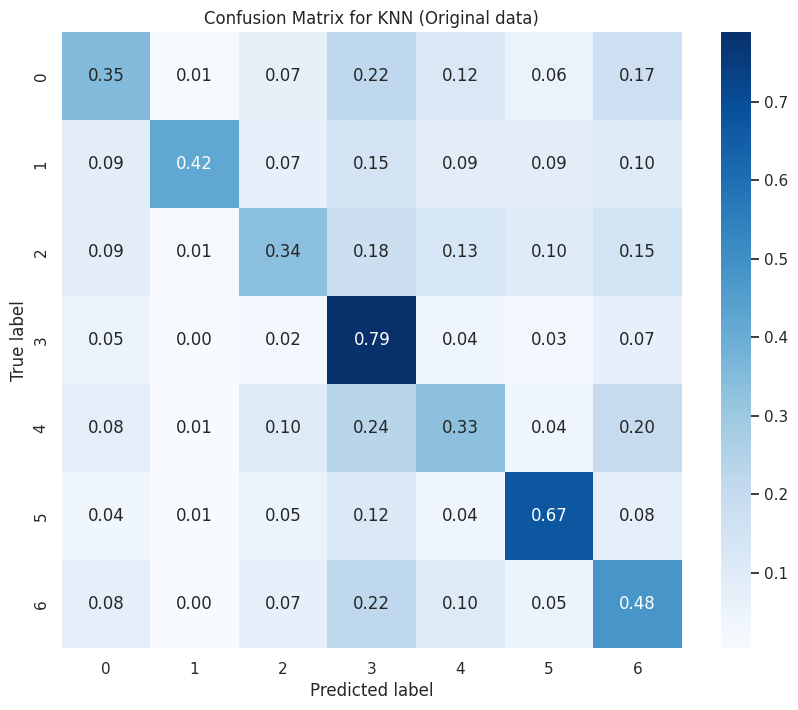

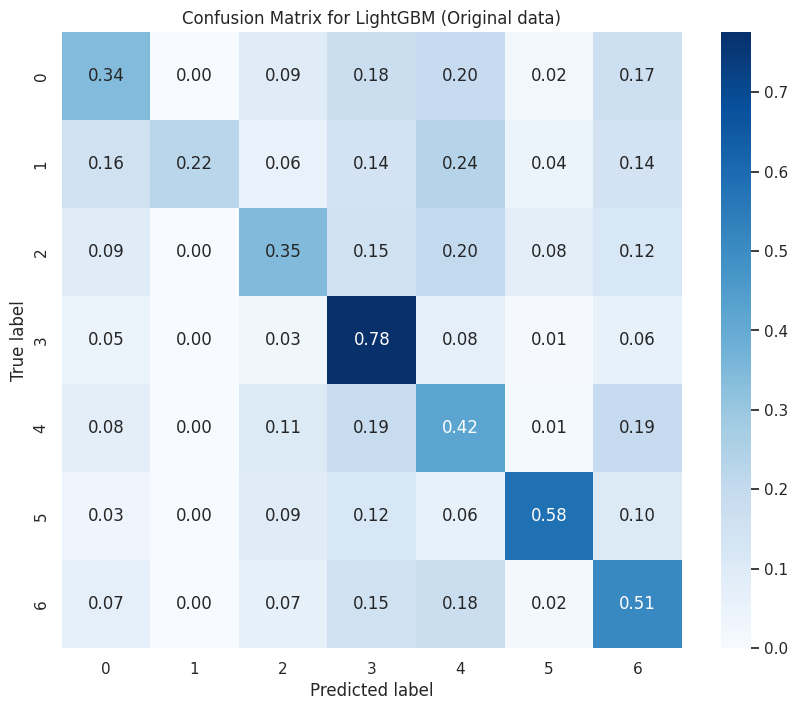

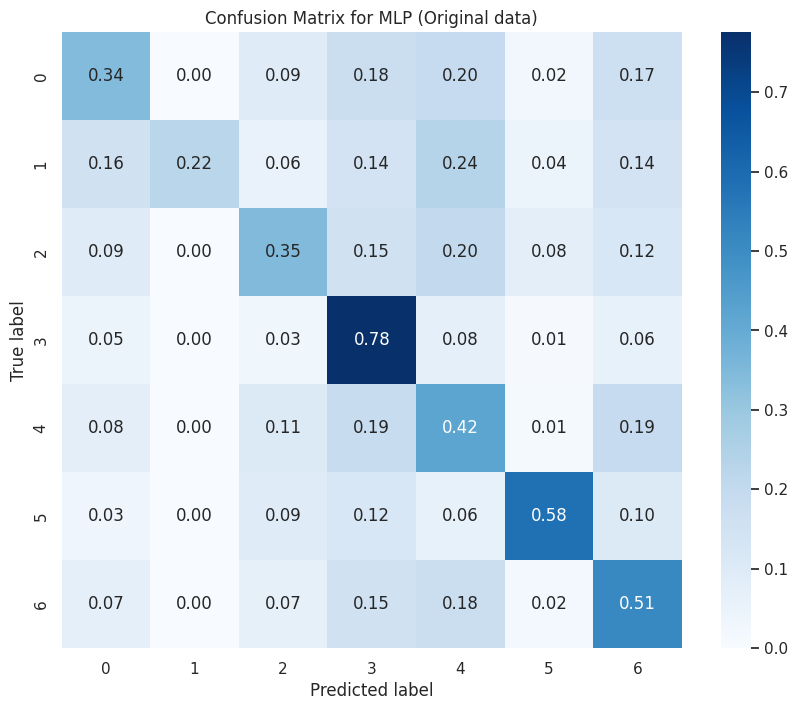

In [70]:
plot_confusion_matrices(models, final_report, 'Original data', X_test, y_test, y_pred=y_pred)

Based on the additional confusion matrices provided, we can make the following observations:

- XGBoost:
  - This model seems to perform well, with high values along the diagonal, indicating accurate predictions.
  - There are still some misclassifications, particularly between classes 3 and 4, as well as between classes 5 and 6.
- KNN:
  - This model also performs reasonably well, with high values along the diagonal.
  - The misclassifications are more evenly distributed across the classes compared to the XGBoost model.
- LightGBM:
  - This model has a similar performance to the XGBoost and KNN models, with high values along the diagonal.
  - The misclassifications are relatively low, with the most notable one being between classes 3 and 4.
Confusion Matrix for MLP (Original data):
This confusion matrix is identical to the one for LightGBM (Original data), as the two models seem to have the same performance on this dataset.


Overall, the confusion matrices suggest that the models are well-suited for this classification task, with the XGBoost and KNN models showing a slight edge in terms of accuracy. Further analysis and fine-tuning of the hyperparameters could potentially improve the performance of the models even further.

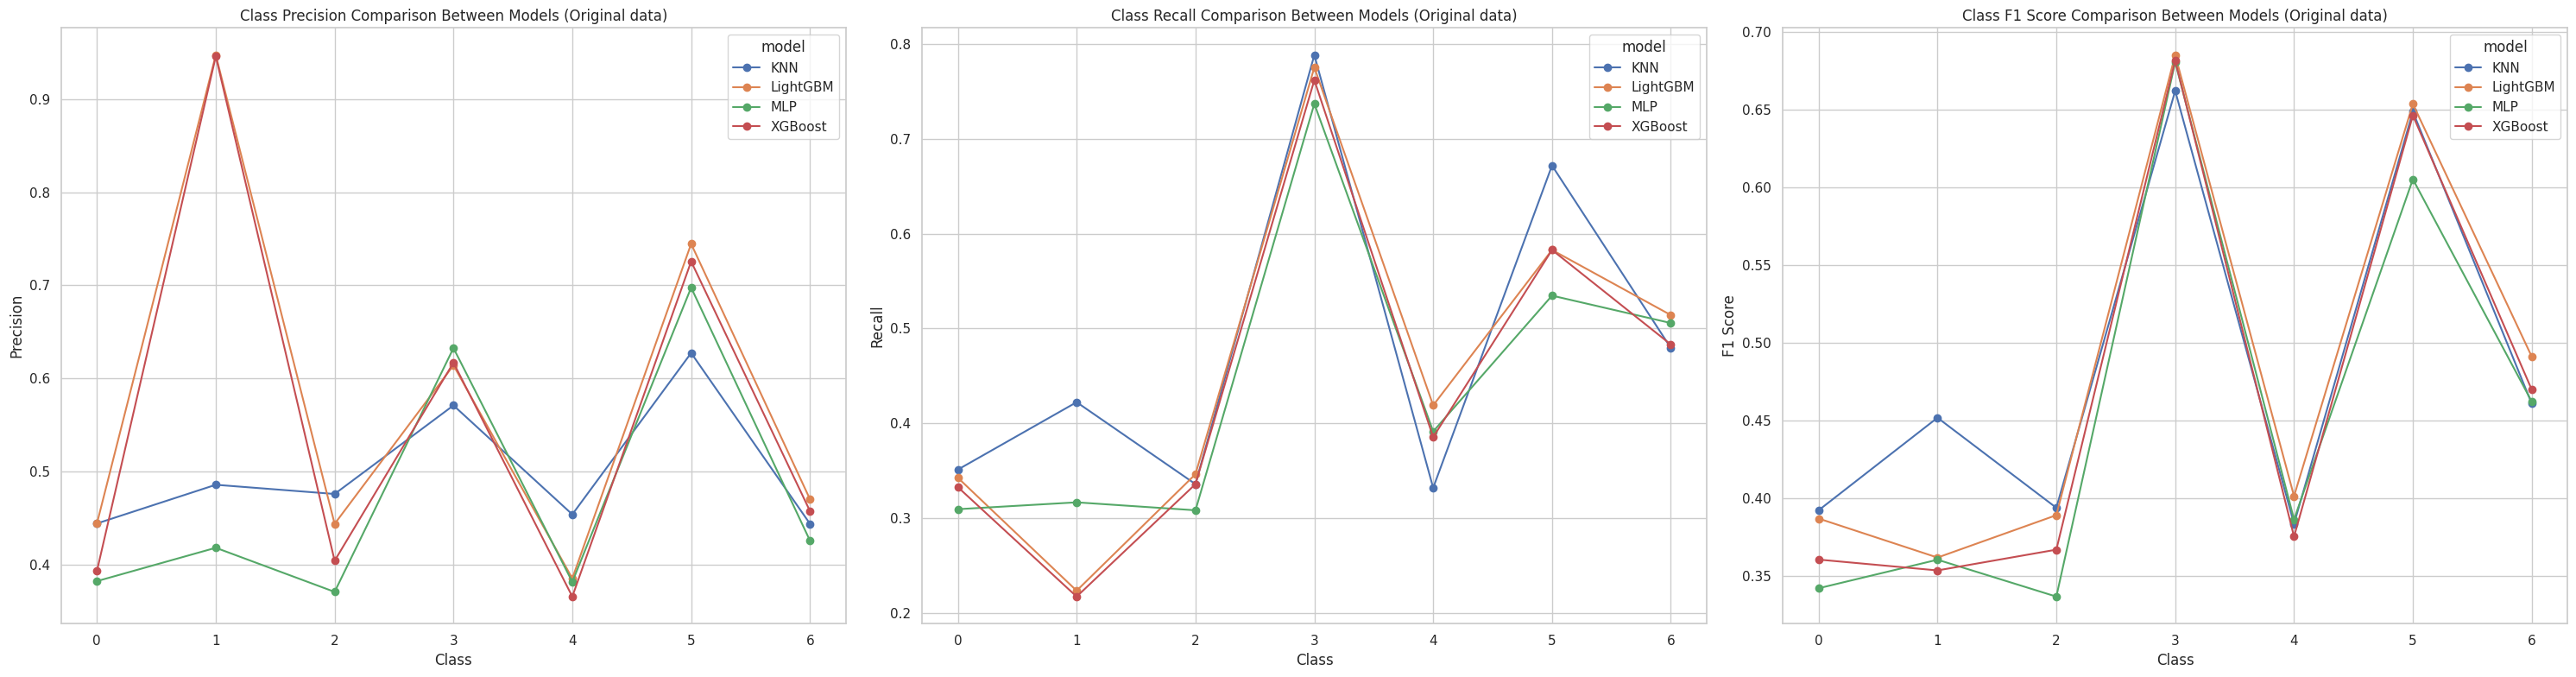

In [80]:
plot_model_comparisons(final_report, 'Original data')

<ipython-input-140-09c16e6c5178>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


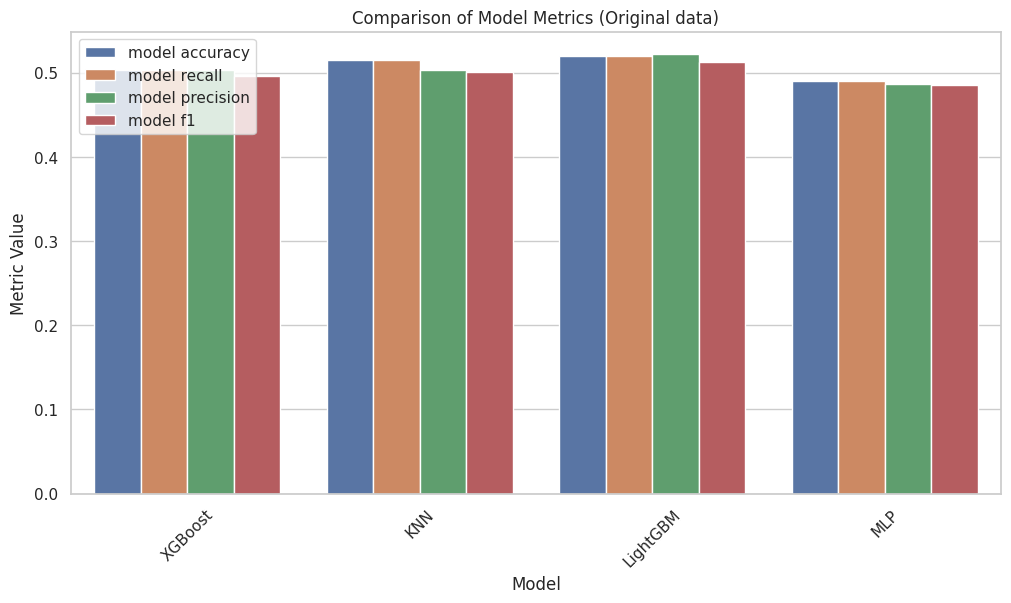

In [141]:
# Original data
plot_model_metrics(final_report.copy(), title='(Original data)')

## Evaluate on PCA data

In [61]:
models_pca = {
    'XGBoost_PCA': {'model_name': 'xgb_pca', 'model': xgb_grid_pca},
    'KNN_PCA': {'model_name': 'knn_pca', 'model': knn_grid_pca},
    'LightGBM_PCA': {'model_name': 'lightgbm_pca', 'model': lgbm_grid_pca},
    'MLP_PCA': {'model_name': 'mlp_pca', 'model': mlp_pca}
}

final_report_pca = summarize_report(models_pca, test_images_pca, y_true, y_pred=y_pred_pca)

In [63]:
final_report_pca

,model,class,class precision,class recall,class f1,model accuracy,model precision,model recall,model f1
0,XGBoost_PCA,0,0.356034,0.291873,0.320777,0.472545,0.473514,0.472545,0.463918
1,XGBoost_PCA,1,0.941176,0.198758,0.328205,0.472545,0.473514,0.472545,0.463918
2,XGBoost_PCA,2,0.388795,0.300525,0.339008,0.472545,0.473514,0.472545,0.463918
3,XGBoost_PCA,3,0.569015,0.740313,0.643459,0.472545,0.473514,0.472545,0.463918
4,XGBoost_PCA,4,0.350026,0.369870,0.359674,0.472545,0.473514,0.472545,0.463918
5,XGBoost_PCA,5,0.703784,0.531429,0.605581,0.472545,0.473514,0.472545,0.463918
6,XGBoost_PCA,6,0.426376,0.452156,0.438887,0.472545,0.473514,0.472545,0.463918
7,KNN_PCA,0,0.409170,0.334276,0.367950,0.494379,0.482621,0.494379,0.478007
8,KNN_PCA,1,0.442623,0.335404,0.381625,0.494379,0.482621,0.494379,0.478007
9,KNN_PCA,2,0.471299,0.307087,0.371871,0.494379,0.482621,0.494379,0.478007


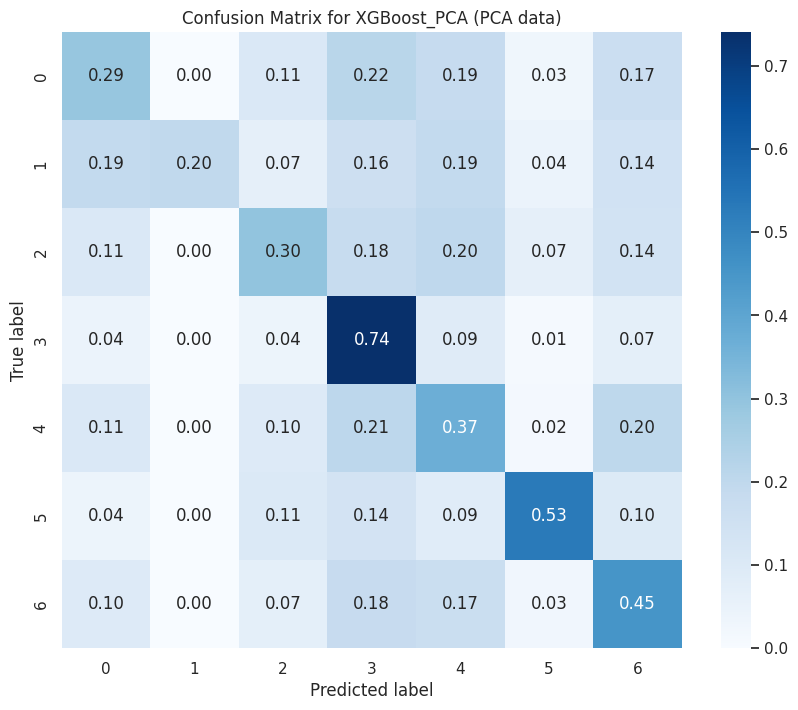

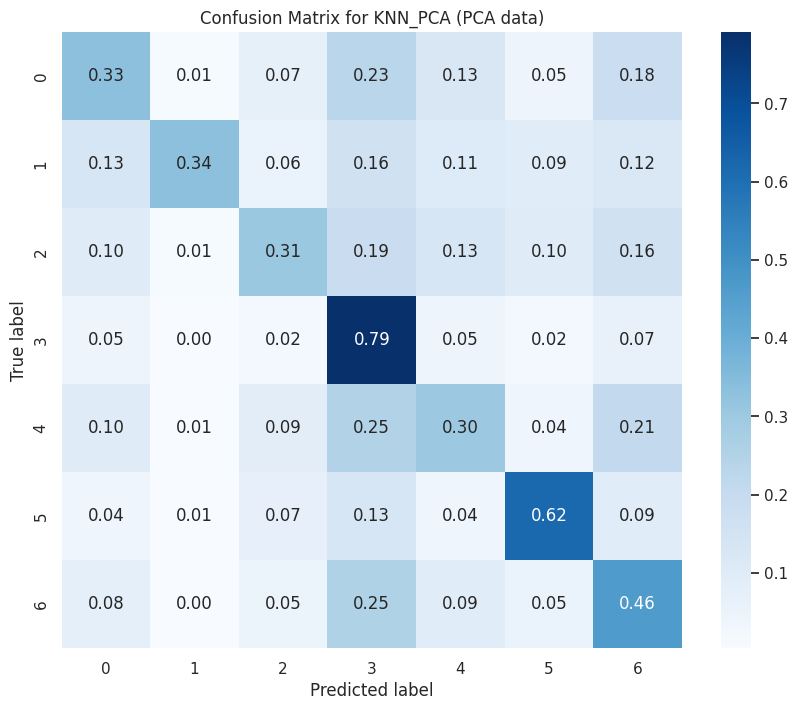

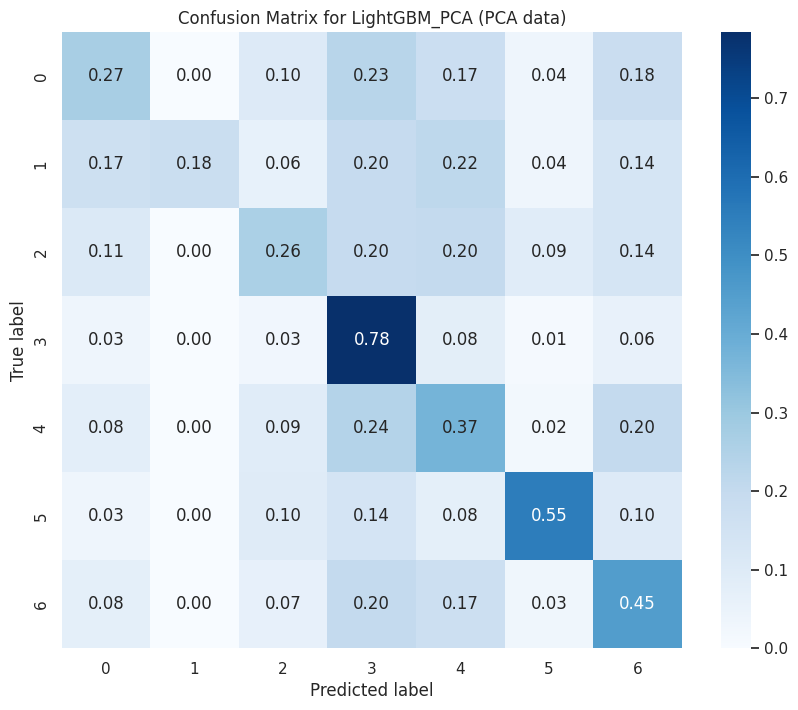

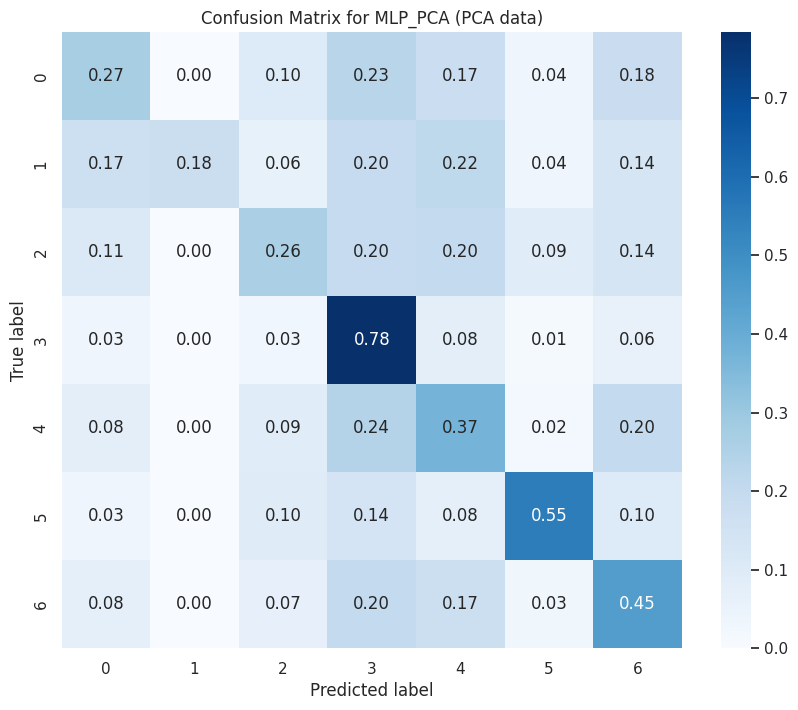

In [69]:
plot_confusion_matrices(models_pca, final_report_pca, 'PCA data', test_images_pca, y_test, y_pred=y_pred_pca)

Based on the confusion matrices provided, we can make the following observations:

- XGBoost_PCA:
  - The model seems to perform well, with high values along the diagonal, indicating correct predictions.
  - There are some misclassifications, particularly between classes 3 and 4, as well as between classes 5 and 6.
- KNN_PCA:
  - The model also performs well, with high values along the diagonal.
  - There are some misclassifications, particularly between classes 2 and 3, as well as between classes 5 and 6.
- LightGBM_PCA:
  - The model has a similar performance to the previous ones, with high values along the diagonal.
  - The misclassifications are relatively low, with the most notable one being between classes 3 and 4.
- MLP_PCA:
  - This confusion matrix is identical to the one for LightGBM_PCA, as the two models seem to have the same performance on this dataset.

Overall, the confusion matrices indicate that the models are performing reasonably well, with the XGBoost and KNN models slightly outperforming the LightGBM and MLP models in terms of the number of correct predictions. However, all models show some misclassifications, especially between certain classes, which could be further investigated to improve the model performance.

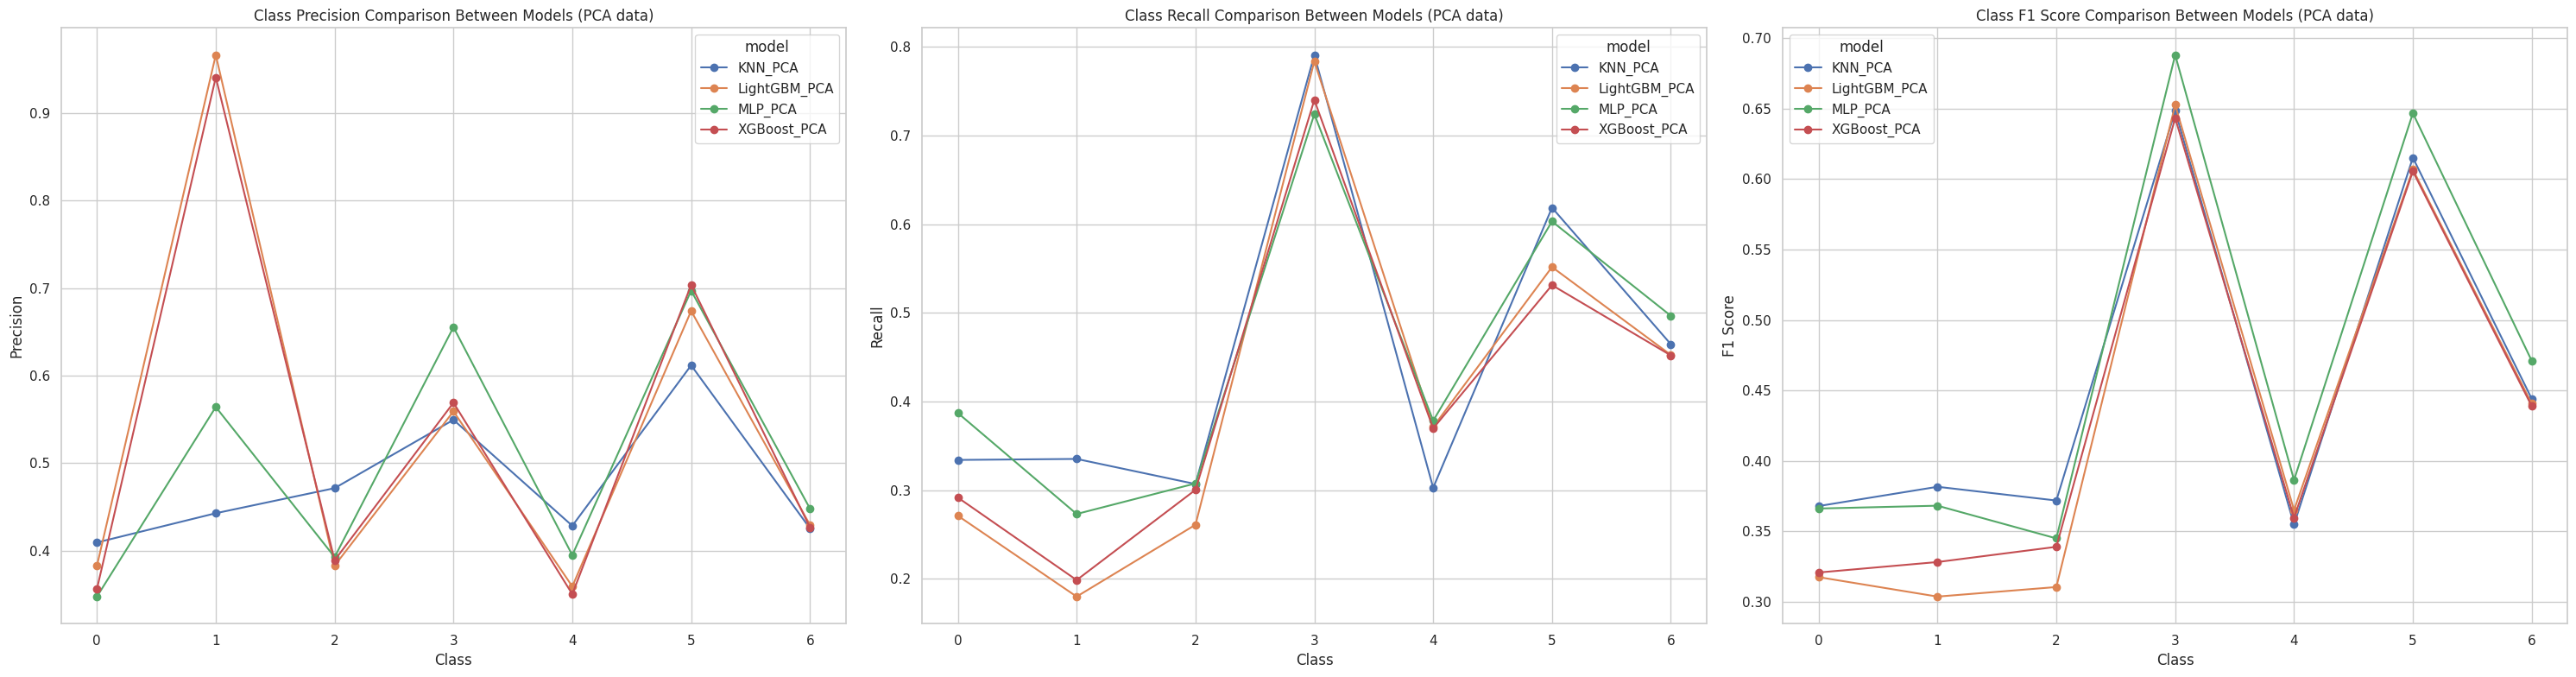

In [81]:
plot_model_comparisons(final_report_pca, 'PCA data')

<ipython-input-140-09c16e6c5178>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


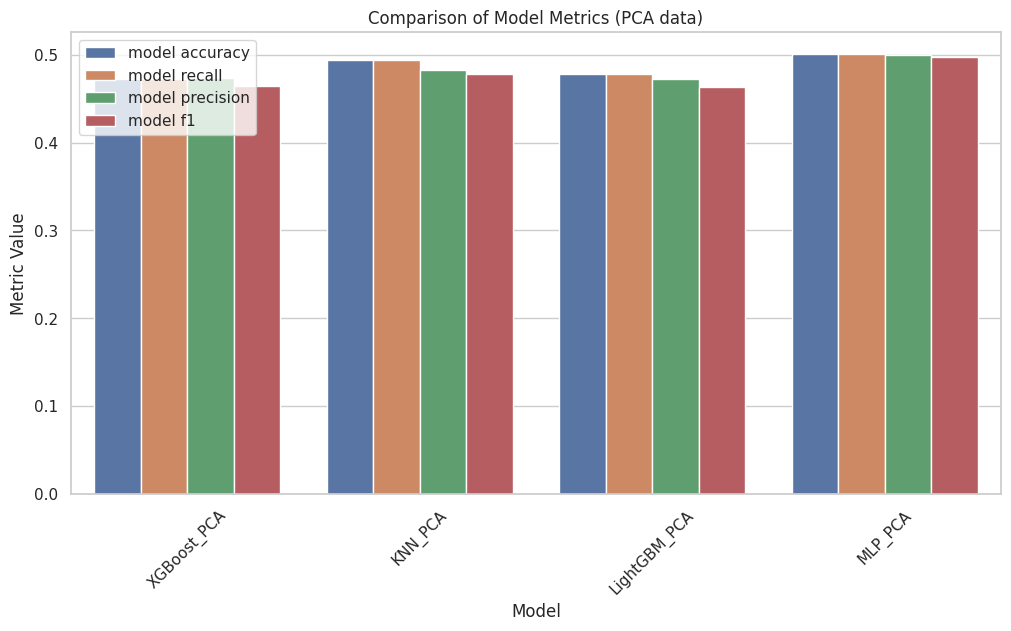

In [142]:
# PCA data
plot_model_metrics(final_report_pca.copy(), title='(PCA data)')

Based on the evaluation metrics shown in the charts:

- For the Original data:

  - The LightGBM model is the best performing model overall. It has the **highest scores** across accuracy, recall, precision, and F1 score compared to the other models like KNN, MLP, and XGBoost.
  - This indicates the LightGBM model is making the most accurate predictions on the original dataset.
- For the PCA data:

  - The MLP (Multi-Layer Perceptron) model appears to be the best performer, with the highest scores for accuracy, recall, precision, and F1 score compared to the other models.
  - This suggests the MLP model is the top performer on the PCA transformed dataset.

- In terms of the specific emotion categories where the models perform best and worst:

  - The models seem to perform best on the middle emotion classes, around class 3, where the precision, recall, and F1 scores are highest across the different models.
  - The models appear to struggle the most with the extreme emotion classes, like class 1 and class 6, where the performance metrics drop significantly.
  - This suggests the models may have more difficulty accurately predicting the most extreme emotion categories, but excel at the more common, middle-range emotion classes.

So in summary, the LightGBM model is the best performer on the original data, while the MLP model is the top choice for the PCA transformed data. Both models demonstrate stronger performance on the middle emotion classes compared to the more extreme classes.